In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Naman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df = pd.read_csv("../data/sofmattress_train.csv")
df.head()

,sentence,label
0,You guys provide EMI option?,EMI
1,Do you offer Zero Percent EMI payment options?,EMI
2,0% EMI.,EMI
3,EMI,EMI
4,I want in installment,EMI


In [5]:
df['sentence'] = df['sentence'].astype(str).str.lower().str.strip()
df['label'] = df['label'].str.strip()

In [6]:
df.head()

,sentence,label
0,you guys provide emi option?,EMI
1,do you offer zero percent emi payment options?,EMI
2,0% emi.,EMI
3,emi,EMI
4,i want in installment,EMI


In [7]:
label_counts = df['label'].value_counts()
print("\nLabel Distribution:\n", label_counts)


Label Distribution:
 DISTRIBUTORS             34
EMI                      25
MATTRESS_COST            22
LEAD_GEN                 21
PRODUCT_VARIANTS         21
ORDER_STATUS             21
WHAT_SIZE_TO_ORDER       20
100_NIGHT_TRIAL_OFFER    18
ORTHO_FEATURES           17
RETURN_EXCHANGE          14
COD                      12
COMPARISON               11
ERGO_FEATURES            11
ABOUT_SOF_MATTRESS       11
DELAY_IN_DELIVERY        11
CANCEL_ORDER             10
PILLOWS                  10
CHECK_PINCODE            10
WARRANTY                 10
OFFERS                   10
SIZE_CUSTOMIZATION        9
Name: label, dtype: int64


In [8]:
df['word_count'] = df['sentence'].apply(lambda x: len(word_tokenize(x)))
print("\nSentence Length Stats:\n", df['word_count'].describe())


Sentence Length Stats:
 count    328.000000
mean       4.405488
std        2.554046
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       28.000000
Name: word_count, dtype: float64


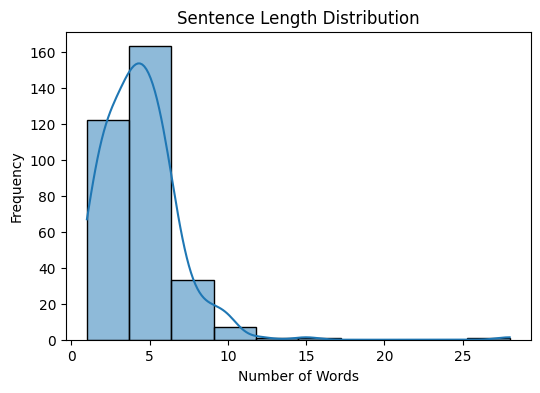

In [9]:
plt.figure(figsize=(6, 4))
sns.histplot(df['word_count'], bins=10, kde=True)
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [10]:
def get_common_words(label, top_n=10):
    words = []
    for sentence in df[df['label'] == label]['sentence']:
        words.extend(word_tokenize(sentence))
    return Counter(words).most_common(top_n)

print("\nTop words for EMI:\n", get_common_words("EMI"))


Top words for EMI:
 [('emi', 14), ('paisa', 6), ('i', 5), ('finance', 5), ('want', 4), ('to', 4), ('available', 4), ('is', 4), ('you', 3), ('?', 3)]


In [11]:
print("\nTop words for COD:\n", get_common_words("COD"))


Top words for COD:
 [('cod', 9), ('is', 5), ('?', 5), ('option', 4), ('can', 4), ('do', 3), ('on', 3), ('delivery', 3), ('you', 2), ('to', 2)]


In [12]:
# Get unique labels in sequence
unique_labels = df['label'].unique().tolist()
print("\nLabels in sequence:", unique_labels)



Labels in sequence: ['EMI', 'COD', 'ORTHO_FEATURES', 'ERGO_FEATURES', 'COMPARISON', 'WARRANTY', '100_NIGHT_TRIAL_OFFER', 'SIZE_CUSTOMIZATION', 'WHAT_SIZE_TO_ORDER', 'LEAD_GEN', 'CHECK_PINCODE', 'DISTRIBUTORS', 'MATTRESS_COST', 'PRODUCT_VARIANTS', 'ABOUT_SOF_MATTRESS', 'DELAY_IN_DELIVERY', 'ORDER_STATUS', 'RETURN_EXCHANGE', 'CANCEL_ORDER', 'PILLOWS', 'OFFERS']
